In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from csnet.training.statistics import get_npz_statistics, build_config_params, plot_distribution

In [10]:
# NPZ_FOLDER = "/storage_common/angiod/NMR/RNA/npz/test.single.atomname.at"
NPZ_FOLDER = "/storage_common/angiod/NMR/DFT/npz.nopbc/train/"
FEAT = "cs" # "chemical_shifts"
TYPE = "node_type" # "atom_types"

statistics = get_npz_statistics(NPZ_FOLDER, FEAT, TYPE)
# FEAT_PRED = "chemical_shifts_pred"
# statistics_pred = get_npz_statistics(NPZ_FOLDER, FEAT_PRED, TYPE)

Starting analysis...
2000 files analysed.
Computing statistics...
Completed!


In [ ]:
resnames = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'CYX', 'GLN', 'GLU',
            'GLY', 'HID', 'HIE', 'HIS', 'ILE', 'LEU', 'LYS', 'MET',
            'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']
# resnames = ['A', 'G', 'U', 'C']
atomname = "CE"

for resname in resnames:
    plot_distribution(statistics, resname, atomname, index=None, method='reduced')
    # plot_distribution(statistics_pred, resname, atomname, src='pred')

In [17]:
for k, v in statistics.items():
    print(k, v.value.mean(), v.value.std())

1 25.227781856670106 3.6133334356471156
6 58.59909668901077 53.47351617703107
7 -9.911044003115265 118.08327021373404
8 -63.65153026928528 197.93187914065766


(array([  42.,  206., 3845., 2170., 3536., 3938., 3376., 2717., 1983.,
        2882.]),
 array([-567.39 , -479.305, -391.22 , -303.135, -215.05 , -126.965,
         -38.88 ,   49.205,  137.29 ,  225.375,  313.46 ]),
 <BarContainer object of 10 artists>)

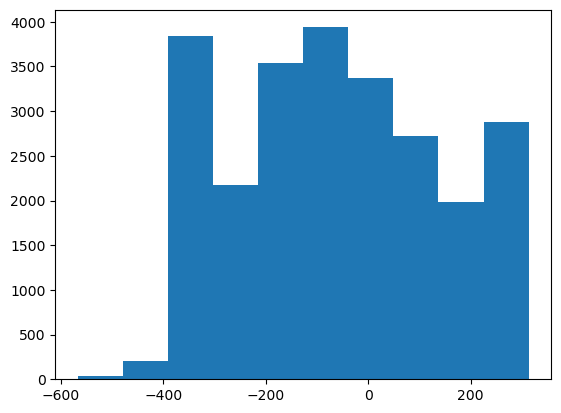

In [23]:
from matplotlib import pyplot as plt
plt.hist(statistics[8].value.values)

# Remove Outlayers #

In [ ]:
import os
import glob
import shutil
import numpy as np

NPZ_FOLDER = "/storage_common/angiod/NMR/UCBShift/npz/reduced_atom_type/train_bmrb"
NPZ_OUT_FOLDER = "/storage_common/angiod/NMR/UCBShift/npz/reduced_atom_type/train_bmrb_clean"

outlayers = [
    # /storage_common/angiod/NMR/UCBShift/npz/reduced_atom_type/train
    ('1OSPO', 'CE', 'LYS', 117),
    ('1OSPO', 'CE', 'LYS', 269),
    ('2ESPA', 'CE', 'LYS', 4),
    ('2ITLA', 'CE', 'LYS', 253),
    ('1Y2GB', 'CE', 'MET', 74),
    ('1HFCA', 'CE', 'MET', 160),
    ('1HFCA', 'CE', 'MET', 236),
    # /storage_common/angiod/NMR/UCBShift/npz/reduced_atom_type/test
    ('1XIOA', 'CE', 'LYS', 210),
    # /storage_common/angiod/NMR/UCBShift/npz/reduced_atom_type/train_bmrb
    ('2n4u', 'CE', 'LYS', 459),
    ('2nbv', 'CE', 'LYS', 31),
    ('2k7z', 'CE', 'LYS', 246),
    ('2k6q', 'CE', 'LYS', 344),
    ('2mpn', 'CE', 'MET', 113),
    ('2mpn', 'CE', 'MET', 160),
    ('2mpn', 'CE', 'MET', 167),
    ('5w3g', 'CE', 'MET', 230),
]

index = None
method = 'reduced'

for outlayer in outlayers:
    
    filename, atomname, resname, resnumber = outlayer
    
    _filename = os.path.join(NPZ_OUT_FOLDER, f"{filename}.npz")
    if not os.path.isfile(_filename):
        _filename = os.path.join(NPZ_FOLDER, f"{filename}.npz")
    try:
        ds = dict(np.load(_filename, allow_pickle=True))
    except:
        continue

    atomname_fltr = ds['atom_names'] == atomname
    resname_fltr = ds['atom_resnames'] == resname
    resnumber_fltr = ds['atom_resnumbers'] == int(resnumber)
    fltr = atomname_fltr * resname_fltr * resnumber_fltr

    if sum(fltr) == 1:
        ds['chemical_shifts'][:, fltr] = np.nan
    else:
        print(f"{filename} has {sum(fltr)} matches")
        ds['chemical_shifts'][:, fltr] = np.nan

    os.makedirs(NPZ_OUT_FOLDER, exist_ok=True)
    _out_filename = os.path.join(NPZ_OUT_FOLDER, f"{filename}.npz")
    np.savez(_out_filename, **ds)
    print(f"File {_out_filename} saved!")

# for filename in glob.glob(os.path.join(NPZ_FOLDER, "*.npz")):
#     out_filename = filename.replace(NPZ_FOLDER, NPZ_OUT_FOLDER)
#     if os.path.isfile(out_filename):
#         continue
#     shutil.copyfile(filename, out_filename)

#  Build Per-Type stats Config File #

In [ ]:
# - Build type_names.yaml and per_type_bias.yaml files - #

CONFIG_ROOT = '../config/training/RNA'
CONFIG_NAME = 'atomname.pertype.stats.yaml'

type_names = None
type_names = [
"A.H1'",
"A.H2" ,
"A.H2'",
"A.H61",
"A.H62",
"A.H8",
"A.HO2'",
"A.C1'",
"A.C2",
"A.C2'",
"A.C3'",
"A.C4",
"A.C4'",
"A.C5",
"A.C5'",
"A.C6",
"A.C8",
"A.N1",
"A.N3",
"A.N6",
"A.N7",
"A.N9",
"A.O2'",
"A.P" ,
"C.H41",
"C.H42",
"C.H5",
"C.C4",
"C.C5",
"C.C6",
"C.N1",
"C.N3",
"C.N4",
"G.H1",
"G.N2",
"G.N3"
]
type_names = [
"H1",
"H1'",
"H2",
"H2'",
"H3",
"H3'",
"H41",
"H42",
"H4'",
"H5",
"H5'",
"H5''",
"H6",
"H61",
"H62",
"H8",
"HO2'",
"C1'",
"C2",
"C2'",
"C3'",
"C4",
"C4'",
"C5",
"C5'",
"C6",
"C8",
"N1",
"N2",
"N3",
"N4",
"N6",
"N7",
"N9",
"O",
"P", 
]
build_config_params(statistics, CONFIG_ROOT, confname=CONFIG_NAME, type_names=type_names, method='reduced')

# ------------------------------------------------------ #